In [8]:
pip install missingno

  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer

In [11]:
df = pd.read_csv("data/The Heart Failure Prediction Dataset.csv")

In [12]:
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,24,21-30,Female,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


In [13]:
# Display the statistical summary of all the numerical variables present in data.
df.describe()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,368.000000,368.000000,368.000000,304.000000,339.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,342.000000,368.000000,368.000000,368.000000,353.000000
mean,54.293478,0.195652,0.461957,121.119046,0.035398,219.991848,51.681522,1.716902,138.019022,4.210870,...,0.562500,1.541848,1.842391,1.002717,5.858696,2.052632,0.983696,0.747283,0.217391,28.728045
std,8.718158,0.397242,0.499229,25.281759,0.185057,139.337387,62.582571,3.609296,4.079879,0.394984,...,0.496754,1.385381,0.564284,1.037442,1.744319,1.040320,0.126816,0.435162,0.413033,15.863399
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.750000,0.000000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,...,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,15.000000
50%,55.000000,0.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,60.250000,0.000000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,...,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,...,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,60.000000


In [14]:
# Display the Number of Variables & Number of Observations
print(df.shape)

(368, 60)


Age                                                                                           0
Age.Group                                                                                     0
Gender                                                                                        0
Locality                                                                                     16
Marital status                                                                                0
Life.Style                                                                                    7
Sleep                                                                                         0
Category                                                                                      0
Depression                                                                                    0
Hyperlipi                                                                                    14
Smoking                                 

<AxesSubplot:>

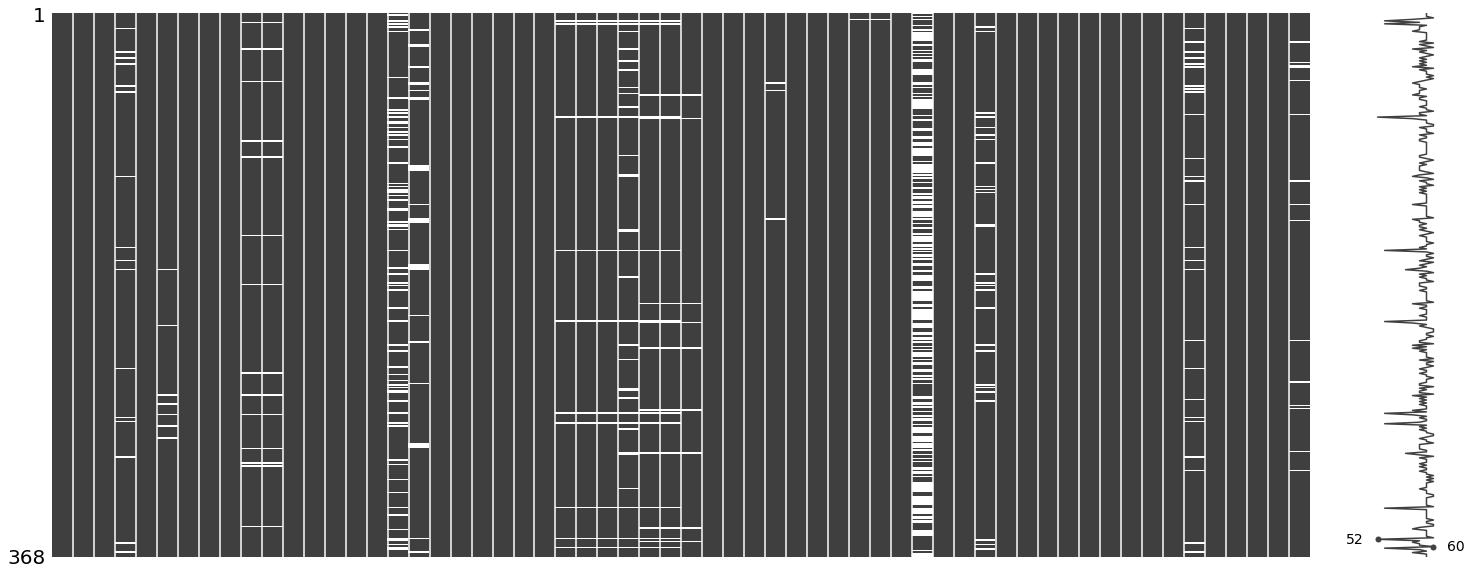

In [15]:
# Identify the count of missing values and display it with the matrix
print(df.isna().sum())
msno.matrix(df)

In [16]:
# Display the number of unique values for each column
print(df.nunique())

Age                                                                                         31
Age.Group                                                                                    5
Gender                                                                                       2
Locality                                                                                     2
Marital status                                                                               2
Life.Style                                                                                   2
Sleep                                                                                        2
Category                                                                                     2
Depression                                                                                   2
Hyperlipi                                                                                    2
Smoking                                           

Text(0, 0.5, 'Frequency of Mortality')

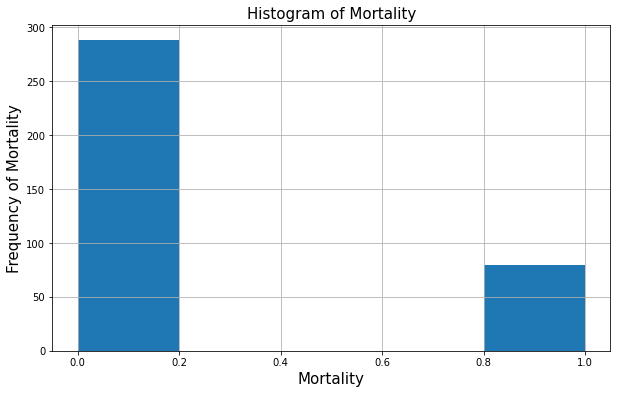

In [17]:
df['Mortality'].hist(bins=5, figsize=(10, 6))
plt.title('Histogram of Mortality', size=15)
plt.xlabel('Mortality', size=15)
plt.ylabel('Frequency of Mortality', size = 15)

In [18]:
df['Mortality'].value_counts(dropna=False)

0    288
1     80
Name: Mortality, dtype: int64

In [19]:
df.duplicated().any()

True

In [20]:
df.duplicated().sum()

74

In [21]:
# Remove duplicate rows based on all columns
df = df.drop_duplicates()

In [22]:
df.duplicated().sum()

0

In [23]:
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,24,21-30,Female,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


In [24]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [25]:
# Delete whitespaces from column names
df.columns = df.columns.str.replace(" ", "")

In [26]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality', 'Maritalstatus', 'Life.Style',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [27]:
# Delete period . from column names
df.columns = df.columns.str.replace(".", "")

/var/folders/81/v8w4n6nn7zj3643gphk1898r0000gn/T/ipykernel_10408/556245649.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(".", "")


In [28]:
df.columns

Index(['Age', 'AgeGroup', 'Gender', 'Locality', 'Maritalstatus', 'LifeStyle',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'FamilyHistory', 'FHistory', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'BUrea', 'SCr', 'SSodium', 'SPotassium',
       'SChloride', 'CPK', 'CKMB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'PCV',
       'MCV', 'MCH', 'MCHC', 'PLATELET_COUNT', 'NEUTROPHIL', 'LYMPHO',
       'MONOCYTE', 'EOSINO', 'Others', 'CO', 'Diagnosis', 'Hypersensitivity',
       'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK', 'SKReact', 'Reaction',
       'Mortality', 'FollowUp'],
      dtype='object')

In [29]:
# df = df.drop(columns = 'FamilyHistory')

df = df.drop('FamilyHistory', axis = 1)

In [30]:
df.head()

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp
0,24,21-30,Female,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


In [31]:
# Create a list containing column names
list_cols = list(df.columns)

In [32]:
list_cols

['Age',
 'AgeGroup',
 'Gender',
 'Locality',
 'Maritalstatus',
 'LifeStyle',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'FHistory',
 'Diabetes',
 'HTN',
 'Allergies',
 'BP',
 'Thrombolysis',
 'BGR',
 'BUrea',
 'SCr',
 'SSodium',
 'SPotassium',
 'SChloride',
 'CPK',
 'CKMB',
 'ESR',
 'WBC',
 'RBC',
 'Hemoglobin',
 'PCV',
 'MCV',
 'MCH',
 'MCHC',
 'PLATELET_COUNT',
 'NEUTROPHIL',
 'LYMPHO',
 'MONOCYTE',
 'EOSINO',
 'Others',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num',
 'SK',
 'SKReact',
 'Reaction',
 'Mortality',
 'FollowUp']

In [33]:
# Create a list of columns containing only two unique values
two_val_list = []

for i in list_cols:
    if df[i].nunique() == 2:
        two_val_list.append(i)

In [34]:
for i in two_val_list:
    print(f'Column name: {i} \n Values: \n {df[i].value_counts(dropna=False)} \n\n')

Column name: Gender 
 Values: 
 Male      231
Female     63
Name: Gender, dtype: int64 


Column name: Locality 
 Values: 
 URBAN    176
RURAL    104
NaN       14
Name: Locality, dtype: int64 


Column name: Maritalstatus 
 Values: 
 MARRIED    291
SINGLE       3
Name: Maritalstatus, dtype: int64 


Column name: LifeStyle 
 Values: 
 YES    168
NO     119
NaN      7
Name: LifeStyle, dtype: int64 


Column name: Sleep 
 Values: 
 NO     178
YES    116
Name: Sleep, dtype: int64 


Column name: Category 
 Values: 
 FREE    266
PAID     28
Name: Category, dtype: int64 


Column name: Depression 
 Values: 
 YES    280
NO      14
Name: Depression, dtype: int64 


Column name: Hyperlipi 
 Values: 
 YES    261
NO      20
NaN     13
Name: Hyperlipi, dtype: int64 


Column name: Smoking 
 Values: 
 YES    154
NO     127
NaN     13
Name: Smoking, dtype: int64 


Column name: FHistory 
 Values: 
 0    238
1     56
Name: FHistory, dtype: int64 


Column name: Diabetes 
 Values: 
 0    163
1    131


In [35]:
# Example of how to convert string to numerical - only for columns with two unique values
# We will talk about how to convert object columns which have more than 2 unique values later
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})

In [36]:
# df['Locality'] = df['Locality'].map({'URBAN':1, 'RURAL':0})

In [37]:
df.head()

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp
0,24,21-30,1,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


In [38]:
# As our strategy to handling missing values, we will use imputation.
# https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/#:~:text=Filling%20the%20Missing%20Values%20%E2%80%93%20Imputation&text=The%20possible%20ways%20to%20do,not%20occur%20in%20the%20data.
# Imputation - Categorical Variables

In [39]:
print(df.isna().sum())

Age                   0
AgeGroup              0
Gender                0
Locality             14
Maritalstatus         0
LifeStyle             7
Sleep                 0
Category              0
Depression            0
Hyperlipi            13
Smoking              13
FHistory              0
Diabetes              0
HTN                   0
Allergies             0
BP                   59
Thrombolysis         27
BGR                   0
BUrea                 0
SCr                   0
SSodium               0
SPotassium            0
SChloride             0
CPK                  10
CKMB                 10
ESR                  10
WBC                  32
RBC                  19
Hemoglobin           19
PCV                   9
MCV                   0
MCH                   0
MCHC                  0
PLATELET_COUNT        3
NEUTROPHIL            0
LYMPHO                0
MONOCYTE              0
EOSINO                1
Others                1
CO                    0
Diagnosis           130
Hypersensitivity

In [40]:
# Create a list of columns which have missing values in it
null_list = df.columns[df.isna().any()].tolist()

In [41]:
null_list

['Locality',
 'LifeStyle',
 'Hyperlipi',
 'Smoking',
 'BP',
 'Thrombolysis',
 'CPK',
 'CKMB',
 'ESR',
 'WBC',
 'RBC',
 'Hemoglobin',
 'PCV',
 'PLATELET_COUNT',
 'EOSINO',
 'Others',
 'Diagnosis',
 'trestbps',
 'num',
 'FollowUp']

In [42]:
# Find a list of columns which have missing values AND its dtype is object
null_cat_list = []

for i in null_list:
    if df[i].dtypes == 'object':
        null_cat_list.append(i)

In [43]:
null_cat_list

['Locality', 'LifeStyle', 'Hyperlipi', 'Smoking', 'Others', 'Diagnosis']

In [44]:
df.head()

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp
0,24,21-30,1,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


In [45]:
# For imputation, we will create a function.

def categorical_imputer (data_table, col):
    """
    Impute null values in categorical variable with the most frequently observed value.
    
    Input parameter:
    data_table: dataframe
    col: object column with null value
    """
    
    imputer = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    data_table[col] = imputer.fit_transform(df[[col]])
    
    # OR
    
#     imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#     df[col] = imputer.fit_transform(df[col].values.reshape(-1,1))[:,0]

In [46]:
for i in null_cat_list:
    categorical_imputer(df, i)

In [47]:
df.head()

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp
0,24,21-30,1,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


# Homework 9/7


1. list만들기

    a. missing value, normal distribution (with histogram), numerical columns
    
    b. missing value, not normal distribution, numerical columns
    
    
2. imputer function 만들기

    a. normal - strategy = 'mean'
    
    b. not normal - strategy = 'median'
    
    
3. Check null values


4. Two unique object value columns - 0,1 convert

## Homework 9/14

1. github branch 만들기
2. 저번주 숙제를 해서 add, commit, push하기
3. reviewer - Kate 지정해서 pull request

/Users/hyeminyoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hyeminyoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hyeminyoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='FollowUp', ylabel='Density'>

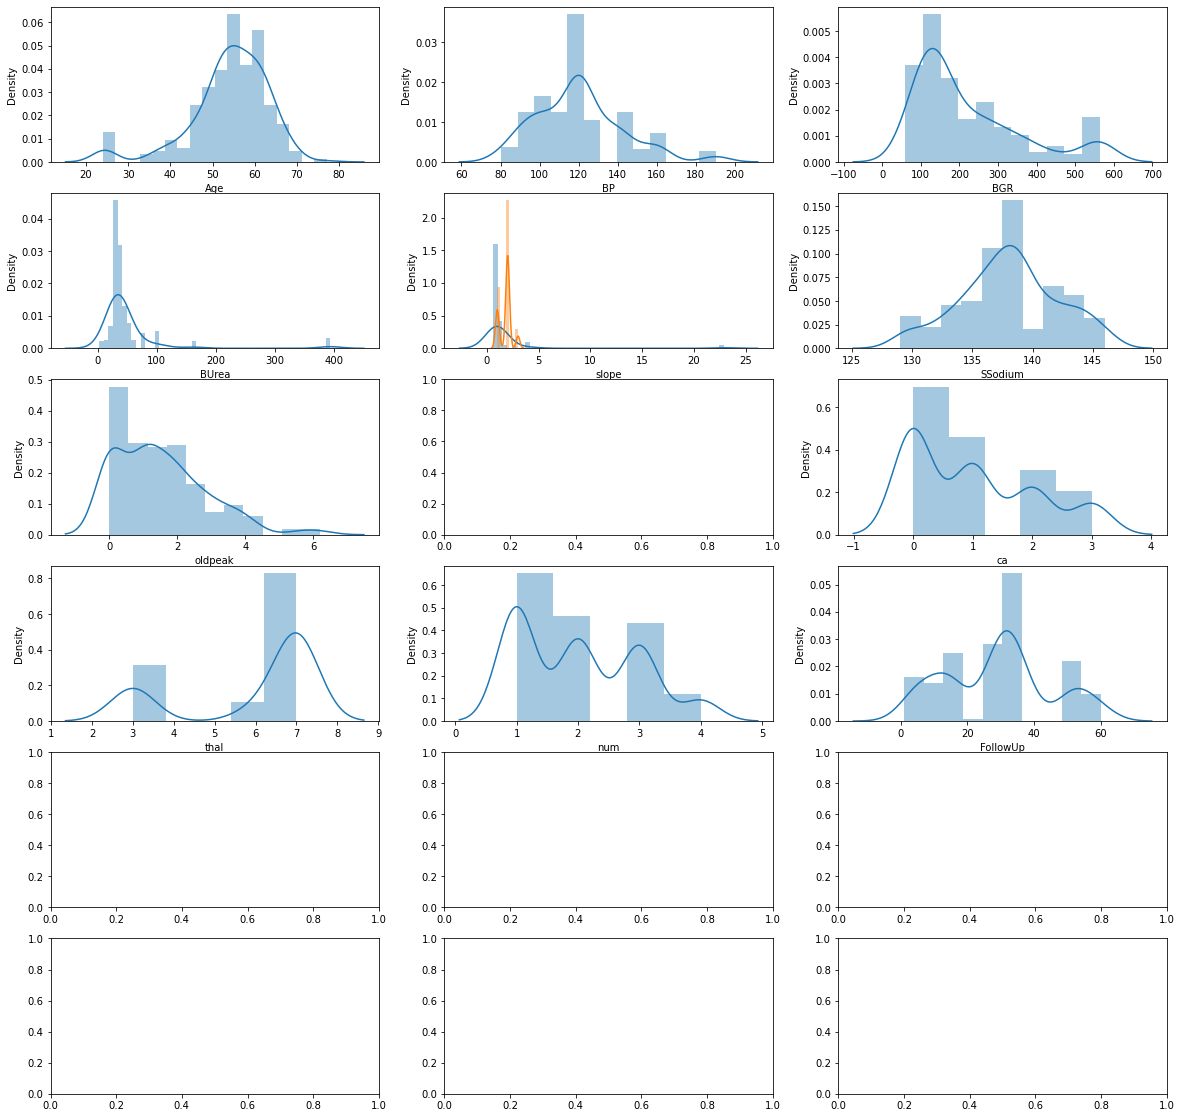

In [71]:
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(20,20))

sns.distplot(df['Age'], ax=ax[0,0])
sns.distplot(df['BP'], ax=ax[0,1])
sns.distplot(df['BGR'], ax=ax[0,2])
sns.distplot(df['BUrea'], ax=ax[1,0])
sns.distplot(df['SCr'], ax=ax[1,1])
sns.distplot(df['SSodium'], ax=ax[1,2])
sns.distplot(df['oldpeak'], ax=ax[2,0])
sns.distplot(df['slope'], ax=ax[1,1])
sns.distplot(df['ca'], ax=ax[2,2])
sns.distplot(df['thal'], ax=ax[3,0])
sns.distplot(df['num'], ax=ax[3,1])
sns.distplot(df['FollowUp'], ax=ax[3,2])

In [63]:
# oldpeak 은 most frequent 로 해야 하나요?

In [64]:
normal = ['Age', 'BP', 'BUrea', 'slope', 'SSodium', 'FollowUp']
nonormal = ['BGR', 'ca', 'thal', 'num']

In [65]:
def numerical_normdist_imputer (data_table, col):
    """
    Impute null values in categorical variable with the most frequently observed value.
    
    Input parameter:
    data_table: dataframe
    col: object column with null value
    """
    
    imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
    data_table[col] = imputer.fit_transform(df[[col]])

In [66]:
for i in normal:
    numerical_normdist_imputer(df, i)

In [67]:
def numerical_unnormdist_imputer (data_table, col):
    """
    Impute null values in categorical variable with the most frequently observed value.
    
    Input parameter:
    data_table: dataframe
    col: object column with null value
    """
    
    imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
    data_table[col] = imputer.fit_transform(df[[col]])

In [68]:
for i in nonormal:
    numerical_unnormdist_imputer(df, i)

In [69]:
df.isna().sum()

Age                  0
AgeGroup             0
Gender               0
Locality             0
Maritalstatus        0
LifeStyle            0
Sleep                0
Category             0
Depression           0
Hyperlipi            0
Smoking              0
FHistory             0
Diabetes             0
HTN                  0
Allergies            0
BP                   0
Thrombolysis        27
BGR                  0
BUrea                0
SCr                  0
SSodium              0
SPotassium           0
SChloride            0
CPK                 10
CKMB                10
ESR                 10
WBC                 32
RBC                 19
Hemoglobin          19
PCV                  9
MCV                  0
MCH                  0
MCHC                 0
PLATELET_COUNT       3
NEUTROPHIL           0
LYMPHO               0
MONOCYTE             0
EOSINO               1
Others               0
CO                   0
Diagnosis            0
Hypersensitivity     0
cp                   0
trestbps   

In [39]:
non_cat_null_list = list(set(null_list) - set(null_cat_list))
df[non_cat_null_list].dtypes

num               float64
CPK               float64
Thrombolysis      float64
Hemoglobin        float64
PCV               float64
WBC               float64
CKMB              float64
RBC               float64
PLATELET_COUNT    float64
FollowUp          float64
ESR               float64
EOSINO            float64
trestbps          float64
BP                float64
dtype: object

In [40]:
# null_ncat_list = [x for x in null_list if x not in null_cat_list]

# # Or

# # null_ncat_list = []
# # for i in null_list:
# #     if i not in null_cat_list:
# #         null_ncat_list.append(i)


# for i in null_ncat_list:
#     print(f"{i}'s data type: '{df[i].dtypes}")

array([[<AxesSubplot:title={'center':'num'}>,
        <AxesSubplot:title={'center':'CPK'}>,
        <AxesSubplot:title={'center':'Thrombolysis'}>,
        <AxesSubplot:title={'center':'Hemoglobin'}>,
        <AxesSubplot:title={'center':'PCV'}>],
       [<AxesSubplot:title={'center':'WBC'}>,
        <AxesSubplot:title={'center':'CKMB'}>,
        <AxesSubplot:title={'center':'RBC'}>,
        <AxesSubplot:title={'center':'PLATELET_COUNT'}>,
        <AxesSubplot:title={'center':'FollowUp'}>],
       [<AxesSubplot:title={'center':'ESR'}>,
        <AxesSubplot:title={'center':'EOSINO'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'BP'}>, <AxesSubplot:>]],
      dtype=object)

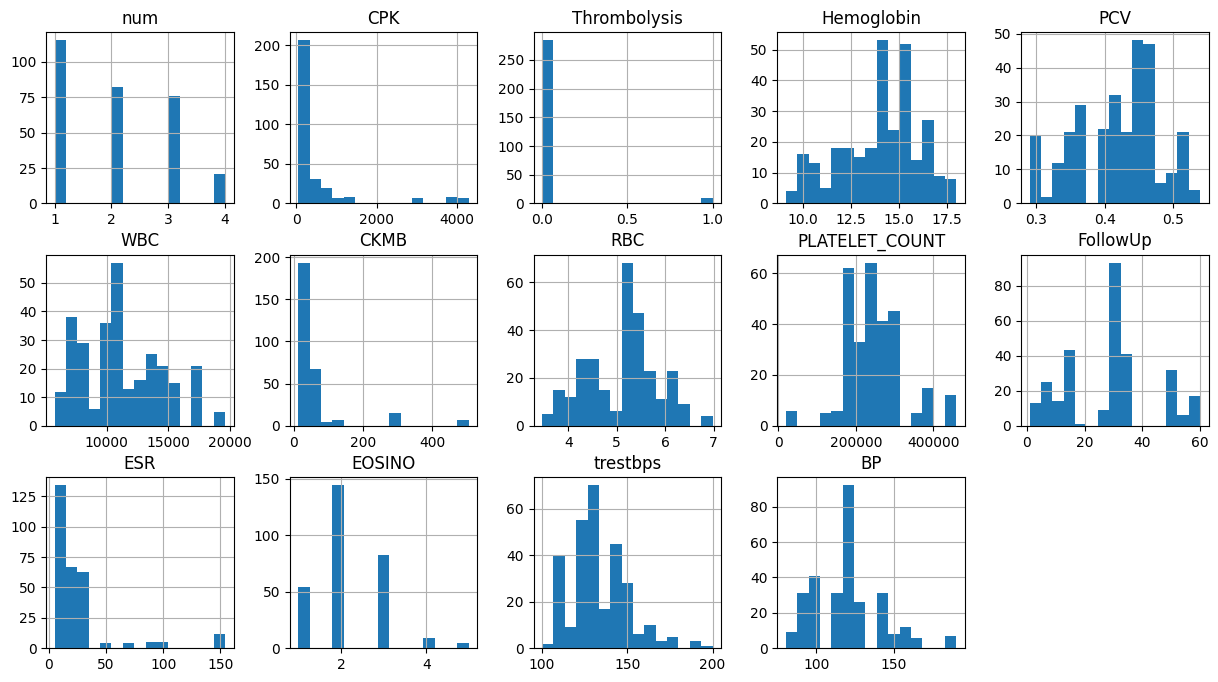

In [69]:
df[non_cat_null_list].hist(bins=15, figsize=(15, 8), layout=(3, 5))

In [42]:
# For imputation, we will create a function.

def numerical_imputer (data_table, col):
    """
    Impute null values in categorical variable with the most frequently observed value.
    
    Input parameter:
    data_table: dataframe
    col: object column with null value
    """
    
    imputer = SimpleImputer(strategy = 'median', missing_values = np.nan)
    data_table[col] = imputer.fit_transform(df[[col]])
    
    # OR
    
#     imputer = SimpleImputer(missing_values=np.nan, strategy='median')
#     df[col] = imputer.fit_transform(df[col].values.reshape(-1,1))[:,0]

In [43]:
for i in non_cat_null_list:
    numerical_imputer(df, i)

In [44]:
print(df.isna().sum())

Age                 0
AgeGroup            0
Gender              0
Locality            0
Maritalstatus       0
LifeStyle           0
Sleep               0
Category            0
Depression          0
Hyperlipi           0
Smoking             0
FHistory            0
Diabetes            0
HTN                 0
Allergies           0
BP                  0
Thrombolysis        0
BGR                 0
BUrea               0
SCr                 0
SSodium             0
SPotassium          0
SChloride           0
CPK                 0
CKMB                0
ESR                 0
WBC                 0
RBC                 0
Hemoglobin          0
PCV                 0
MCV                 0
MCH                 0
MCHC                0
PLATELET_COUNT      0
NEUTROPHIL          0
LYMPHO              0
MONOCYTE            0
EOSINO              0
Others              0
CO                  0
Diagnosis           0
Hypersensitivity    0
cp                  0
trestbps            0
chol                0
fbs       

In [45]:
nunique_df = pd.DataFrame(df.nunique()).reset_index().rename(columns={0:'nunique', 'index':'Column'})

In [46]:
nunique_list = nunique_df[nunique_df['nunique']==2]['Column'].to_list()

In [47]:
df[nunique_list]

,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,Smoking,FHistory,Diabetes,HTN,Allergies,Thrombolysis,Hypersensitivity,fbs,exang,SK,Reaction,Mortality
0,1,URBAN,MARRIED,NO,NO,FREE,NO,YES,NO,0,1,YES,NO,0.0,NO,0,1,1,0,0
1,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,NO,0,0,NO,NO,0.0,NO,0,1,1,1,0
2,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,NO,0,0,NO,NO,0.0,NO,0,1,1,1,0
3,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,NO,0,0,NO,NO,0.0,NO,0,1,1,1,0
4,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,NO,0,0,NO,NO,0.0,NO,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0,URBAN,MARRIED,YES,YES,FREE,YES,YES,YES,0,1,YES,NO,0.0,NO,0,0,1,1,0
364,0,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,1,0,NO,NO,0.0,YES,0,0,1,1,0
365,0,URBAN,MARRIED,NO,NO,FREE,YES,NO,NO,0,0,YES,NO,1.0,NO,0,1,0,1,0
366,0,RURAL,MARRIED,YES,YES,FREE,YES,YES,YES,1,1,YES,NO,0.0,NO,0,1,1,1,0


In [48]:
# Find a list of columns which have missing values AND its dtype is object
nunique_obj_list = []

for i in nunique_list:
    if df[i].dtypes == 'object':
        nunique_obj_list.append(i)

In [49]:
df[nunique_obj_list]

,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,Smoking,HTN,Allergies,Hypersensitivity
0,URBAN,MARRIED,NO,NO,FREE,NO,YES,NO,YES,NO,NO
1,URBAN,MARRIED,YES,YES,FREE,YES,YES,NO,NO,NO,NO
2,URBAN,MARRIED,YES,YES,FREE,YES,YES,NO,NO,NO,NO
3,URBAN,MARRIED,YES,YES,FREE,YES,YES,NO,NO,NO,NO
4,URBAN,MARRIED,YES,YES,FREE,YES,YES,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
363,URBAN,MARRIED,YES,YES,FREE,YES,YES,YES,YES,NO,NO
364,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,NO,YES
365,URBAN,MARRIED,NO,NO,FREE,YES,NO,NO,YES,NO,NO
366,RURAL,MARRIED,YES,YES,FREE,YES,YES,YES,YES,NO,NO


In [50]:
df['Locality'] = df['Locality'].map({'URBAN':1, 'RURAL':0})
df['Maritalstatus'] = df['Maritalstatus'].map({'MARRIED':1, 'SINGLE':0})
df['LifeStyle'] = df['LifeStyle'].map({'YES':1, 'NO':0})
df['Sleep'] = df['Sleep'].map({'YES':1, 'NO':0})
df['Category'] = df['Category'].map({'PAID':1, 'FREE':0})
df['Depression'] = df['Depression'].map({'YES':1, 'NO':0})
df['Hyperlipi'] = df['Hyperlipi'].map({'YES':1, 'NO':0})
df['Smoking'] = df['Smoking'].map({'YES':1, 'NO':0})
df['HTN'] = df['HTN'].map({'YES':1, 'NO':0})
df['Allergies'] = df['Allergies'].map({'YES':1, 'NO':0})
df['Hypersensitivity'] = df['Hypersensitivity'].map({'YES':1, 'NO':0})

In [53]:
df.dtypes

Age                   int64
AgeGroup             object
Gender                int64
Locality              int64
Maritalstatus         int64
LifeStyle             int64
Sleep                 int64
Category              int64
Depression            int64
Hyperlipi             int64
Smoking               int64
FHistory              int64
Diabetes              int64
HTN                   int64
Allergies             int64
BP                  float64
Thrombolysis        float64
BGR                   int64
BUrea               float64
SCr                 float64
SSodium               int64
SPotassium          float64
SChloride             int64
CPK                 float64
CKMB                float64
ESR                 float64
WBC                 float64
RBC                 float64
Hemoglobin          float64
PCV                 float64
MCV                 float64
MCH                 float64
MCHC                float64
PLATELET_COUNT      float64
NEUTROPHIL          float64
LYMPHO              

## 9/28 숙제

1. main branch에서 각자의 브랜치로 바뀐 파일 업데이트해서 브랜치 제일 최신파일로 만들어두기
2. 답안을 바탕으로 각자 코드 수정해서 Pull Request열기
3. multinomial categorical columns - 어떻게 숫자로 변환하는지 리서치 (+ 코드도 함께 리서치)